# Ex3: PCA - sklearn 

## Eigenfaces
- Sử dụng bộ dữ liệu các khuôn mặt sklearn.datasets.fetch_lfw_people, lấy min_faces_per_person=60
- Áp dụng PCA: chúng ta sẽ giảm chiều dữ liệu còn 150 chiều (gốc là ~3000 chiều)
- Trực quan hóa dữ liệu gốc và sau khi giảm chiều

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import fetch_lfw_people

In [4]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [5]:
type(faces)

sklearn.utils.Bunch

In [6]:
print(faces.target_names)
print(faces.images.shape)

[&#39;Ariel Sharon&#39; &#39;Colin Powell&#39; &#39;Donald Rumsfeld&#39; &#39;George W Bush&#39;
 &#39;Gerhard Schroeder&#39; &#39;Hugo Chavez&#39; &#39;Junichiro Koizumi&#39; &#39;Tony Blair&#39;]
(1348, 62, 47)


In [7]:
faces.images[0].shape

(62, 47)

In [8]:
faces.data[0].size

2914

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

In [11]:
pca.explained_variance_ratio_

array([0.18782692, 0.14550318, 0.07100111, 0.06029001, 0.05040161,
       0.02936217, 0.02469282, 0.02047786, 0.01968622, 0.01891434,
       0.01561242, 0.01469925, 0.01214477, 0.01095759, 0.01042819,
       0.00971989, 0.00906832, 0.00877006, 0.00813053, 0.00704723,
       0.00682862, 0.00647882, 0.00603494, 0.00578391, 0.00532262,
       0.00520684, 0.00500025, 0.00476452, 0.00452436, 0.00425207,
       0.00405164, 0.0038007 , 0.00359864, 0.00350867, 0.00347822,
       0.00324879, 0.00314475, 0.00310488, 0.00307685, 0.00289922,
       0.00282611, 0.00274748, 0.00272808, 0.0025997 , 0.00246546,
       0.002382  , 0.00235044, 0.0023152 , 0.00227269, 0.00221832,
       0.00210567, 0.00205797, 0.00202996, 0.0020065 , 0.00195754,
       0.00195432, 0.00188095, 0.00182764, 0.00176693, 0.00175856,
       0.00174926, 0.0016632 , 0.00161306, 0.00158565, 0.00156576,
       0.00152886, 0.00149984, 0.00146119, 0.00145264, 0.00141041,
       0.0014052 , 0.00136413, 0.00136122, 0.00131623, 0.00129

In [12]:
x = sum(pca.explained_variance_ratio_)

In [13]:
x

0.9456478079082444

In [14]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, &#39;150-dim\nreconstruction&#39;)

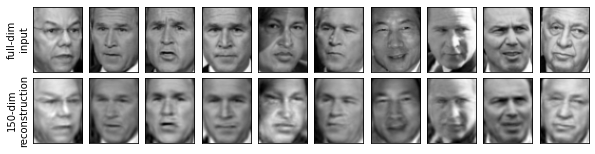

In [15]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')